In [1]:
import pandas as pd
import numpy as np
#import re
#import nltk
import matplotlib.pyplot as plt
import missingno as msno
import difflib #functions for comparing sequences like strings, lists
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv('/home/ubundu/Documents/Luminar_DS/PROJECT/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df=df.reset_index()

<AxesSubplot: >

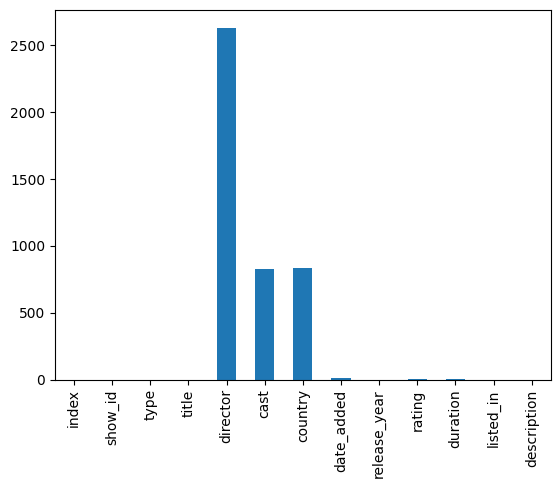

In [7]:
df.isna().sum().plot(kind='bar',)

In [8]:
NA=df.isna().sum()
NA

index              0
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot: >

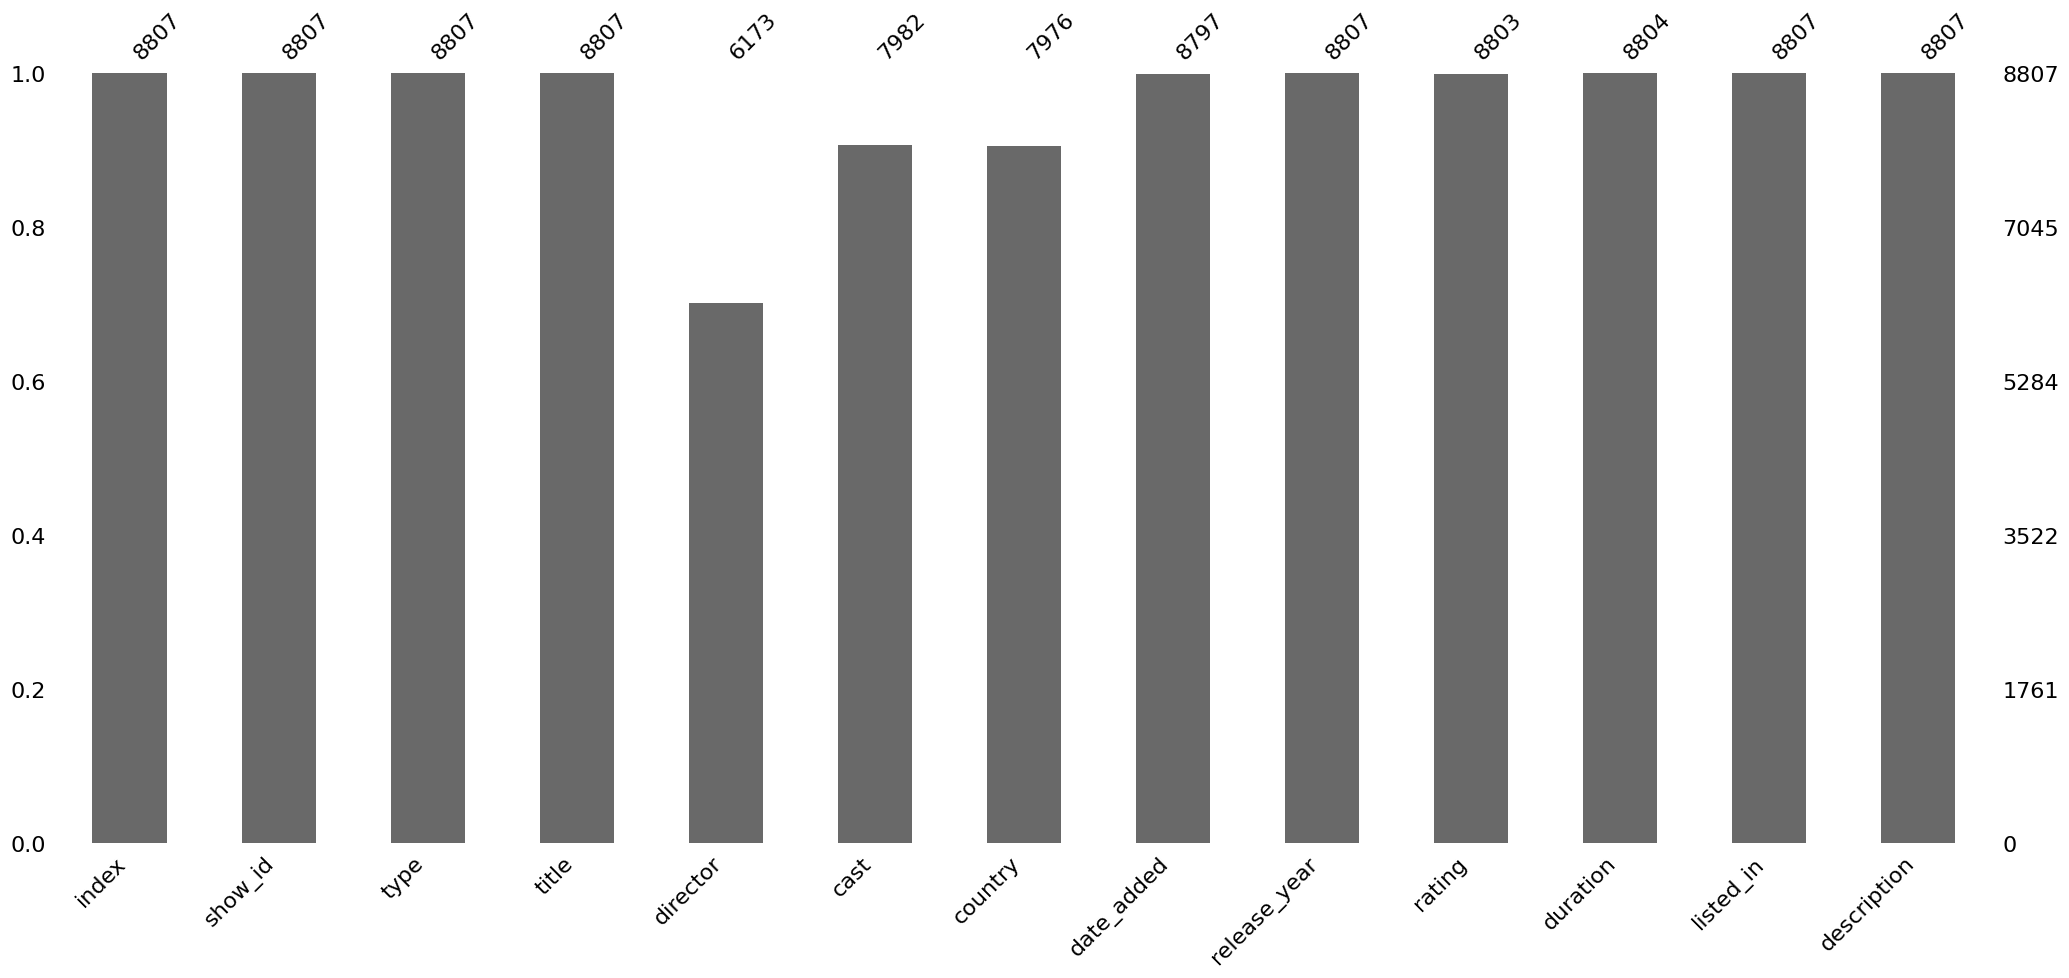

In [9]:
#missingno is best for missing value analysis
msno.bar(df)

<AxesSubplot: >

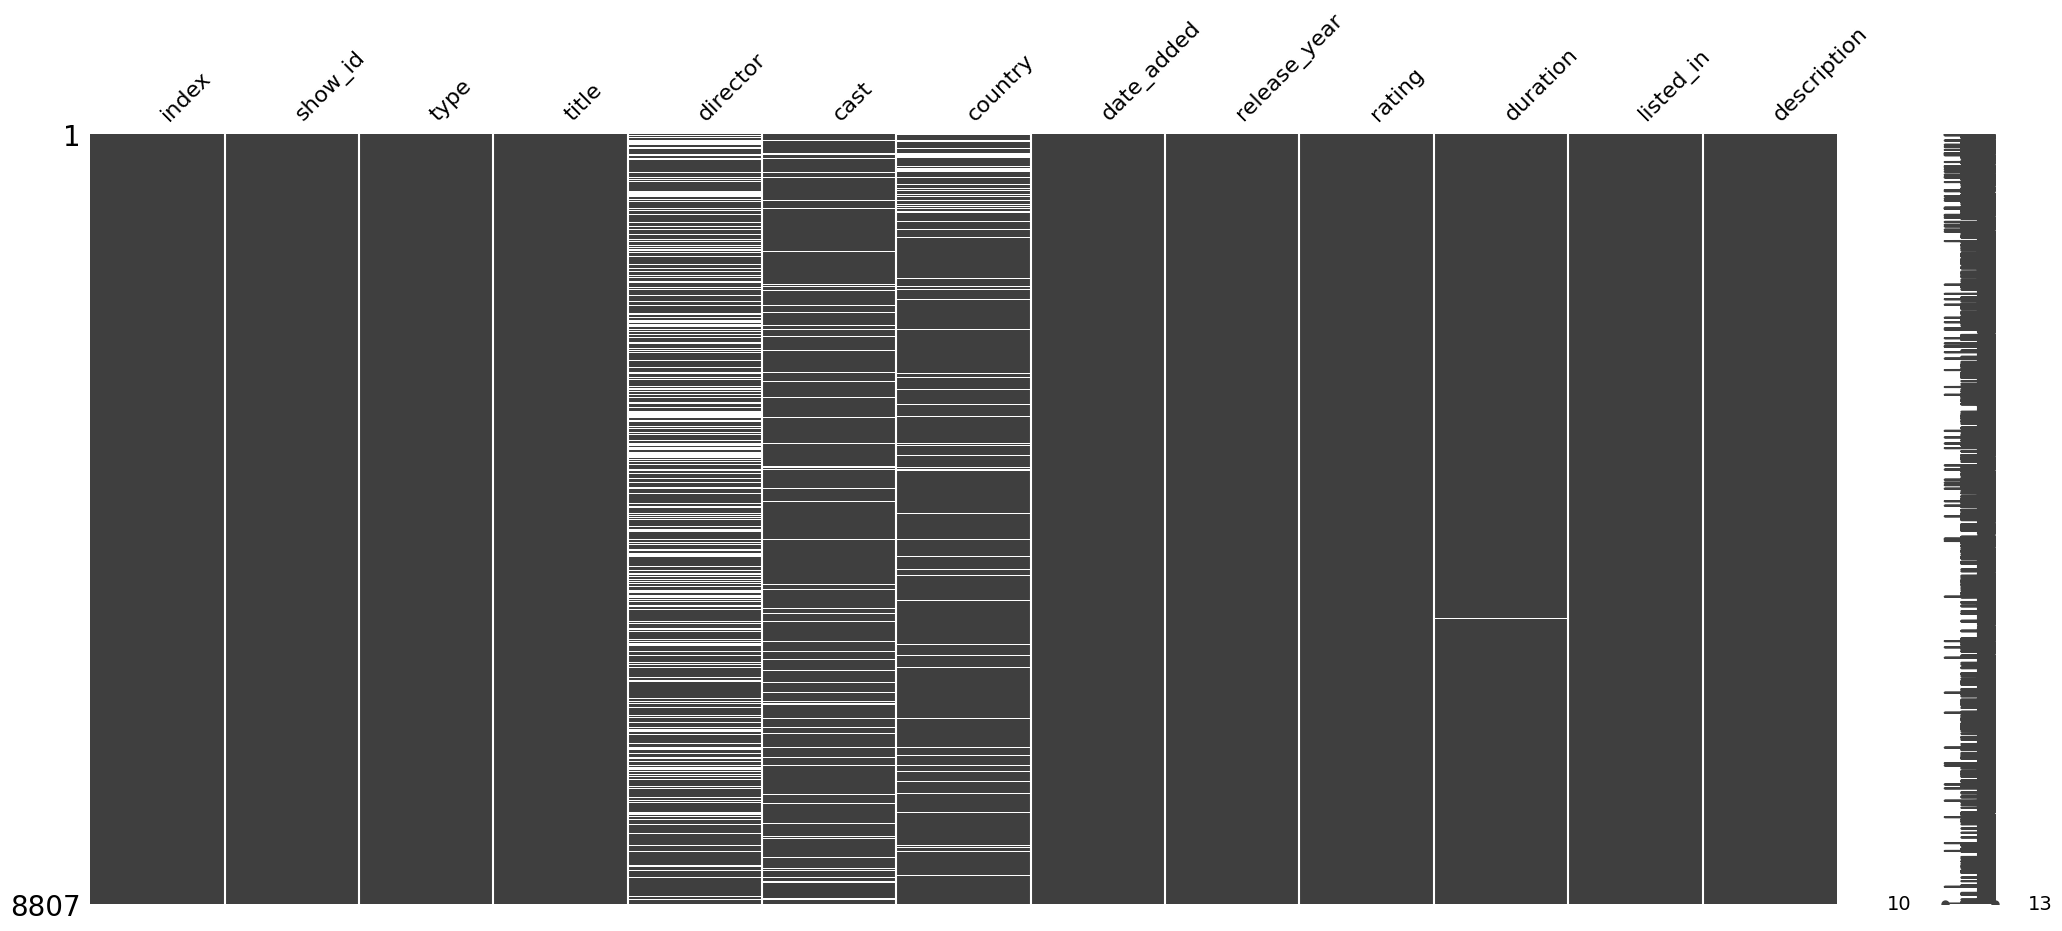

In [10]:
#give positional information of missing values
msno.matrix(df)

<AxesSubplot: >

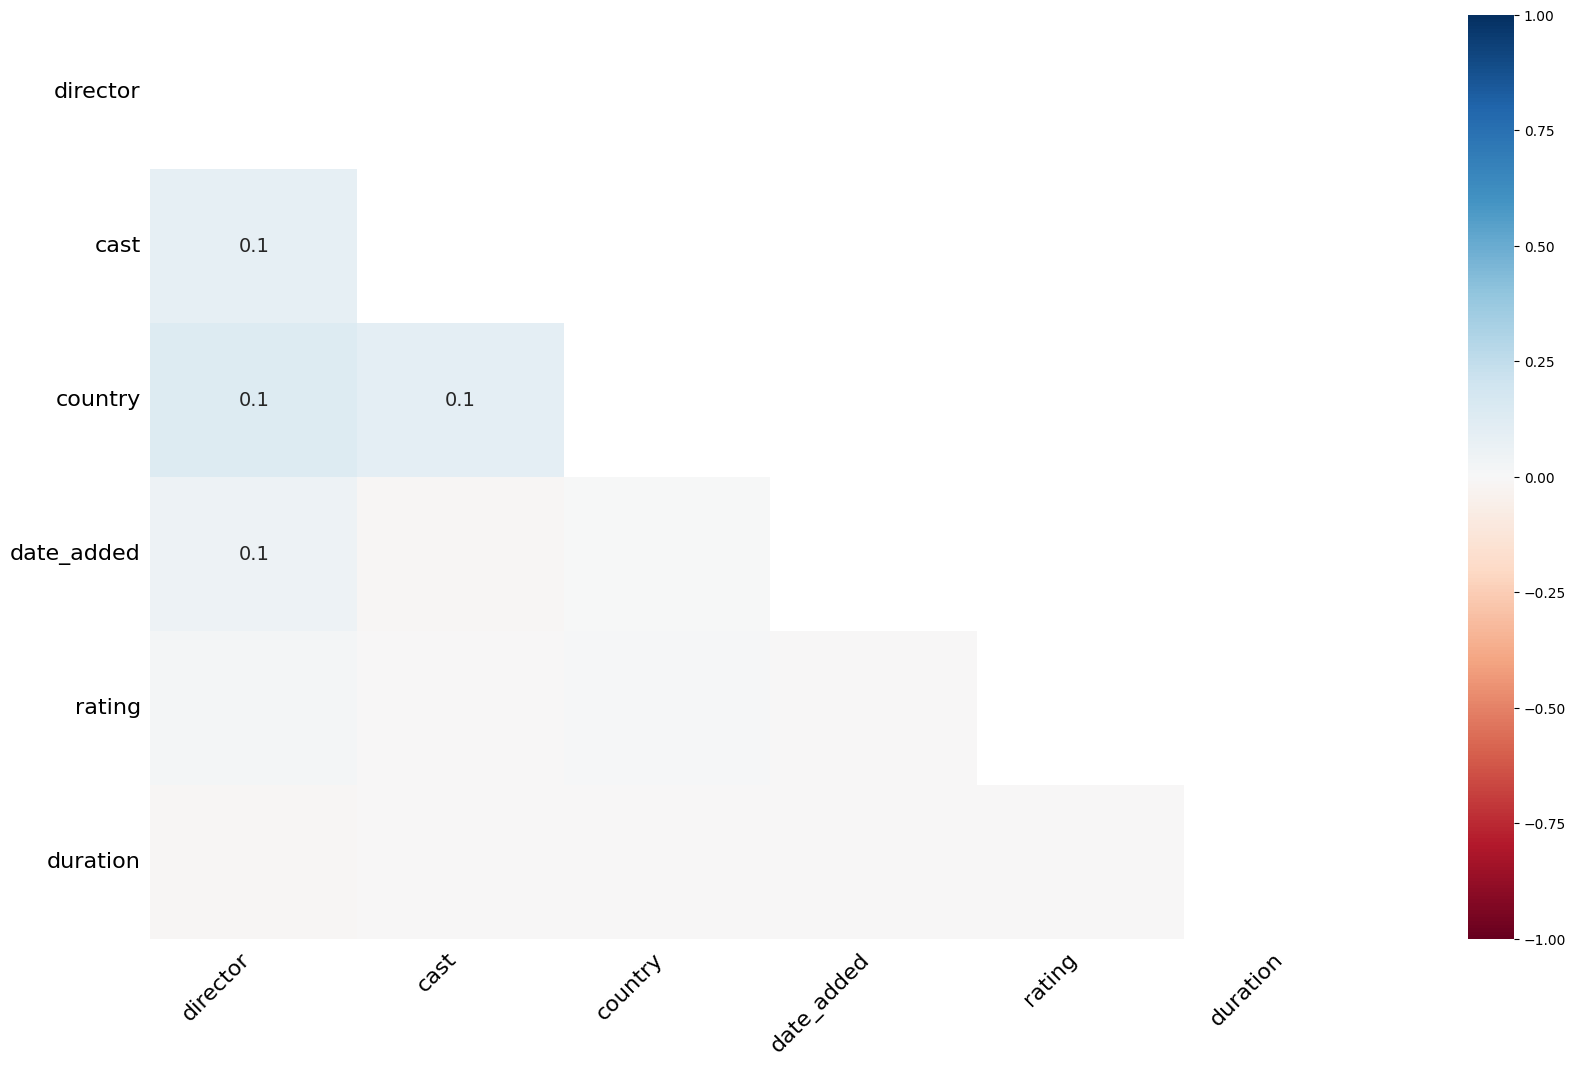

In [11]:
# Gives a heatmap of how missing values are related
msno.heatmap(df)

In [12]:
df.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [13]:
df.nunique()

index           8807
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Feature selection

In [14]:
selected_features=['type','title','director','cast','country','listed_in','description']
selected_features

['type', 'title', 'director', 'cast', 'country', 'listed_in', 'description']

In [15]:
for i in selected_features:
    df[i]=df[i].fillna('')

In [16]:
#companing all selected features
new_df=df['title']+' '+df['type']+' '+df['director']+' '+df['cast']+' '+df['country']+' '+df['listed_in']+' '+df['description']
new_df.head()

0    Dick Johnson Is Dead Movie Kirsten Johnson  Un...
1    Blood & Water TV Show  Ama Qamata, Khosi Ngema...
2    Ganglands TV Show Julien Leclercq Sami Bouajil...
3    Jailbirds New Orleans TV Show    Docuseries, R...
4    Kota Factory TV Show  Mayur More, Jitendra Kum...
dtype: object

In [17]:
new_df[1]

'Blood & Water TV Show  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng South Africa International TV Shows, TV Dramas, TV Mysteries After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [18]:
#converting the text data to feature vectors

In [19]:
vector=TfidfVectorizer()
feature_vectors=vector.fit_transform(new_df)

In [20]:
print(feature_vectors)

  (0, 22119)	0.2550172192994244
  (0, 15559)	0.1505526370215387
  (0, 6590)	0.15754977009534196
  (0, 47404)	0.12319467393445593
  (0, 20377)	0.12440265078745391
  (0, 47858)	0.04442032273003897
  (0, 50955)	0.1714447015388485
  (0, 9967)	0.23534350370609317
  (0, 2302)	0.043831148060915
  (0, 22461)	0.23534350370609317
  (0, 21973)	0.05142654117991365
  (0, 11683)	0.1347030598064078
  (0, 44900)	0.21129450286527635
  (0, 16278)	0.1735098428004065
  (0, 27354)	0.09328390464294582
  (0, 20817)	0.127939150681864
  (0, 33994)	0.04749533162449614
  (0, 14664)	0.1632793718174691
  (0, 47375)	0.07769518453717017
  (0, 32815)	0.23096821845860757
  (0, 15884)	0.12247607423774055
  (0, 20475)	0.078176393213737
  (0, 3253)	0.08582497991479782
  (0, 13068)	0.09402284049580978
  (0, 45011)	0.05303138084035168
  :	:
  (8806, 24676)	0.14718629831371433
  (8806, 527)	0.09507208803863636
  (8806, 6704)	0.10847582080962302
  (8806, 51216)	0.09427838757412148
  (8806, 8866)	0.16117578124138282
  (8806, 

In [21]:
#getting the similarity score using cosine similarrity
similarity=cosine_similarity(feature_vectors)

In [22]:
similarity

array([[1.00000000e+00, 8.75674031e-03, 1.75468881e-02, ...,
        1.36314944e-02, 1.71332351e-02, 2.66324519e-02],
       [8.75674031e-03, 1.00000000e+00, 3.17751302e-02, ...,
        9.62579221e-04, 0.00000000e+00, 2.56216556e-03],
       [1.75468881e-02, 3.17751302e-02, 1.00000000e+00, ...,
        5.09241343e-03, 9.65154839e-03, 2.88732742e-02],
       ...,
       [1.36314944e-02, 9.62579221e-04, 5.09241343e-03, ...,
        1.00000000e+00, 5.76978140e-02, 5.57203224e-03],
       [1.71332351e-02, 0.00000000e+00, 9.65154839e-03, ...,
        5.76978140e-02, 1.00000000e+00, 9.68104807e-03],
       [2.66324519e-02, 2.56216556e-03, 2.88732742e-02, ...,
        5.57203224e-03, 9.68104807e-03, 1.00000000e+00]])

In [23]:
similarity.shape

(8807, 8807)

In [25]:
#getting the movie name from user
movie_name=input('your faavourite movie name: ')

your faavourite movie name: home


In [26]:
#creating list all the movies given in the data set

In [27]:
title_list=df['title'].tolist()

In [28]:
title_list

['Dick Johnson Is Dead',
 'Blood & Water',
 'Ganglands',
 'Jailbirds New Orleans',
 'Kota Factory',
 'Midnight Mass',
 'My Little Pony: A New Generation',
 'Sankofa',
 'The Great British Baking Show',
 'The Starling',
 'Vendetta: Truth, Lies and The Mafia',
 'Bangkok Breaking',
 'Je Suis Karl',
 'Confessions of an Invisible Girl',
 'Crime Stories: India Detectives',
 'Dear White People',
 "Europe's Most Dangerous Man: Otto Skorzeny in Spain",
 'Falsa identidad',
 'Intrusion',
 'Jaguar',
 'Monsters Inside: The 24 Faces of Billy Milligan',
 'Resurrection: Ertugrul',
 'Avvai Shanmughi',
 'Go! Go! Cory Carson: Chrissy Takes the Wheel',
 'Jeans',
 'Love on the Spectrum',
 'Minsara Kanavu',
 'Grown Ups',
 'Dark Skies',
 'Paranoia',
 'Ankahi Kahaniya',
 'Chicago Party Aunt',
 'Sex Education',
 'Squid Game',
 'Tayo and Little Wizards',
 'The Father Who Moves Mountains',
 'The Stronghold',
 'Angry Birds',
 'Birth of the Dragon',
 'Chhota Bheem',
 'He-Man and the Masters of the Universe',
 'Jaws

In [29]:
#finding the close match the movie name given by the user
close_match=difflib.get_close_matches(movie_name,title_list)
print(close_match)

['Home', 'Chloe', 'Philomena']


In [30]:
close_match_1 = close_match[0]
print(close_match_1)

Home


In [31]:
index_of_the_movie = df[df.title == close_match_1]['index'].values[0]
print(index_of_the_movie)

846


In [32]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.07860335406683891), (1, 0.01525912356415194), (2, 0.009670848458585842), (3, 0.01156925489656212), (4, 0.007484699058728376), (5, 0.018563832685419876), (6, 0.021621262074654247), (7, 0.020597580656425328), (8, 0.009297930656880619), (9, 0.01711875107684145), (10, 0.013346368652199115), (11, 0.00617990673540265), (12, 0.008672244260692588), (13, 0.0364123755159949), (14, 0.013072096831094365), (15, 0.010490355806152925), (16, 0.012369788183860263), (17, 0.01791149904700024), (18, 0.017438854304985124), (19, 0.007888512720547712), (20, 0.005292396635907074), (21, 0.005980543434543276), (22, 0.010812332934972274), (23, 0.025627490103535024), (24, 0.018623065867956246), (25, 0.01835738437488301), (26, 0.02866591830720778), (27, 0.030331902499675316), (28, 0.08656768710840028), (29, 0.015872928678818447), (30, 0.006536449326827775), (31, 0.03803242661963862), (32, 0.016021108683366814), (33, 0.02758611050908437), (34, 0.02390839592512416), (35, 0.027417569961287795), (36, 0.01235690

In [33]:
len(similarity_score)

8807

In [34]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(846, 1.0), (4762, 0.23656528471980282), (7411, 0.14512294104340256), (347, 0.14275764247302355), (1603, 0.13754899221849132), (4851, 0.1158426433676395), (486, 0.11516281614464771), (3062, 0.11453246995284846), (8083, 0.11307460965609159), (161, 0.11286207482613475), (6466, 0.10495500423659106), (1931, 0.10493997375637396), (1622, 0.10417821577720904), (7646, 0.1025714144654701), (5140, 0.10045802130822187), (4140, 0.10003774955193369), (2321, 0.09921304980089), (829, 0.09890353426306053), (145, 0.09825866076624881), (6958, 0.09810372446492953), (3764, 0.09810215168139831), (779, 0.09730145972264427), (6354, 0.096933926301438), (8222, 0.09663880076154795), (7070, 0.09592117646511958), (6768, 0.0949523758798371), (7595, 0.09471474200577205), (6503, 0.09439749350722107), (6060, 0.0942586969010422), (8596, 0.09424097898805889), (155, 0.09422579901764427), (4223, 0.09362600149473699), (6911, 0.09220701273487845), (144, 0.09153426654125041), (3626, 0.09142629501581671), (8409, 0.091158072

In [35]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Home
2 . Home: Adventures with Tip & Oh
3 . Martin Lawrence Live: Runteldat
4 . Planet 51
5 . Alien Worlds
6 . Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life
7 . Ratchet and Clank
8 . Jimmy Neutron: Boy Genius
9 . Star-Crossed
10 . Mars Attacks!
11 . Chicken Little
12 . The Boys in the Band
13 . Stargate SG-1
14 . Oh No! It's an Alien Invasion
15 . DreamWorks Home: For the Holidays
16 . LEGO Marvel Super Heroes: Guardians of the Galaxy
17 . George Lopez: We'll Do It For Half
18 . Dog Gone Trouble
19 . House Party 2
20 . Her
21 . I Am Mother
22 . Battlefield Earth
23 . Bolt
24 . The Boy in the Striped Pajamas
25 . Indiana Jones and the Kingdom of the Crystal Skull
26 . Flimflam
27 . Norm of the North: Keys to the Kingdom
28 . Cloverfield
29 . A Thin Line Between Love & Hate
